# Plot Binary grids

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from datetime import datetime, timedelta
import multiprocessing
import os

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/')
from BB_HRRR.HRRR_Pando import get_hrrr_variable, get_hrrr_latlon
from BB_GOES.get_GOES import get_GOES_nearesttime
from BB_GOES.get_GLM import get_GLM_file_nearesttime, accumulate_GLM_FAST, filter_by_HRRR
from BB_datetimes.range import range_dates
from BB_maps.my_basemap import draw_centermap, draw_HRRR_map
from BB_cmap.reflectivity_cmap import reflect_ncdc

from BB_HRRR.GLM_and_HRRR.GLM_events_HRRR import get_GLM_HRRR_contingency_stats

from fires_list import get_fire

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [7.8, 7.2]
mpl.rcParams['figure.titlesize'] = 10
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 7
mpl.rcParams['ytick.labelsize'] = 7
mpl.rcParams['axes.labelsize'] = 7
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['lines.linewidth'] = 1.25
mpl.rcParams['grid.linewidth'] = .25
#mpl.rcParams['figure.subplot.wspace'] = 0.03
#mpl.rcParams['figure.subplot.hspace'] = 0.00
mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 600

Create HRRR map.
loaded /uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_maps/saved_map_objects/HRRR_lcc_c_2000.npy map from file
Forecasts [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Generate domains and masks.
HRRR Area in meters squared: 16811840278558.668
West Area in meters squared: 4034896806752.7593
Central Area in meters squared: 4034896806752.766
East Area in meters squared: 4034896806752.762
Utah Area in meters squared: 219973261639.39685
Colorado Area in meters squared: 269906899003.7569
Texas Area in meters squared: 688270731111.2987
Florida Area in meters squared: 149996892486.02234
dict_keys(['HRRR', 'West', 'Central', 'East', 'Utah', 'Colorado', 'Texas', 'Florida'])


In [5]:
m = draw_HRRR_map()

loaded /uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_maps/saved_map_objects/HRRR_lcc_i_2000.npy map from file


In [10]:
lat, lon = get_hrrr_latlon(DICT=False)

In [13]:
DATE = datetime(2018, 5, 16,2)
a = get_GLM_HRRR_contingency_stats(validDATE=DATE)

>>> get_GLM_HRRR_contingency_stats: 2018-05-16 02:00:00
>>Load binary stats from file /uufs/chpc.utah.edu/common/home/horel-group8/blaylock/GLM-HRRR_LTNG_binary//HRRR-GLM-Binary_2018-05-16_0200.npy


In [6]:
a.keys()

dict_keys(['Number Events', 'table', 'Observed Binary', 'Forecast Binary', 'Number GLM Files', 'Number Expected Files', 'DATETIME'])

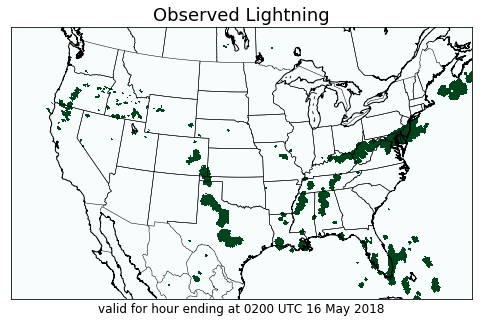

In [33]:
plt.figure(figsize=(10,5))
plt.title('Observed Lightning', fontsize=18)
plt.xlabel('valid for hour ending at %s' % DATE.strftime('%H%M UTC %d %b %Y'), fontsize=12)
m.pcolormesh(lon, lat, a['Observed Binary'], cmap='BuGn', latlon=True)
m.drawcoastlines(); m.drawstates(); m.drawcountries()
plt.savefig('./figs/example_not_shown_Observed')

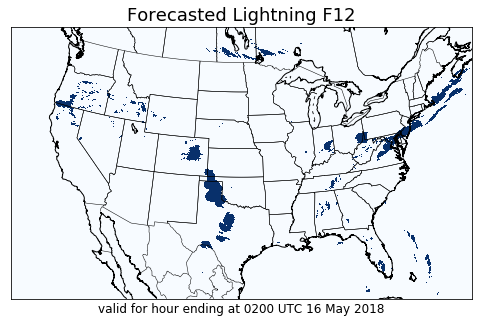

In [34]:
plt.figure(figsize=(10,5))
FXX = 12
plt.title('Forecasted Lightning F%02d' % FXX, fontsize=18)
plt.xlabel('valid for hour ending at %s' % DATE.strftime('%H%M UTC %d %b %Y'), fontsize=12)
m.pcolormesh(lon, lat, a['Forecast Binary'][FXX], cmap='Blues', latlon=True)
m.drawcoastlines(); m.drawstates(); m.drawcountries()
plt.savefig('./figs/example_not_shown_Forecasted')

In [56]:
T = np.zeros_like(a['Observed Binary'], dtype=int)

In [57]:
T[a['Observed Binary']==1] += 1
T[a['Forecast Binary'][FXX]==1] +=10

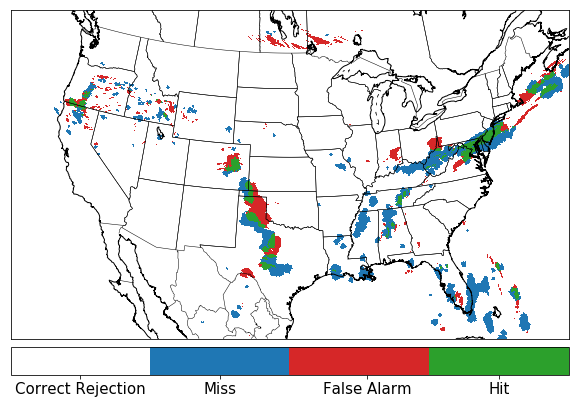

In [110]:
import matplotlib.colors as colors

plt.figure(figsize=(10,15))

cmap = colors.ListedColormap(['white', 'tab:blue', 'tab:red', 'tab:green'])
boundaries = [0,.5,1.5,10.5,15]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

m.pcolormesh(lon, lat, T, latlon=True, cmap=cmap, norm=norm)
m.drawcoastlines(); m.drawstates(); m.drawcountries()

cbar = plt.colorbar(orientation='horizontal',
                    pad=.01,
                   ticks=[0.25,1,6.5,12.75])
cbar.ax.set_xticklabels(['Correct Rejection', 'Miss', 'False Alarm', 'Hit'], fontsize=15);


plt.savefig('./figs/example_not_shown_table')